In [1]:
#importando as bibliotecas iniciais do Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando o dataSet extraído de https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df_AVC = pd.read_csv('https://raw.githubusercontent.com/lucianesantos/DiabetesML/refs/heads/main/healthcare-dataset-stroke-data.csv')

In [3]:
#conhecendo os dados
df_AVC.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**O dataSet contém dados categóricos em String. Algumas categorias tem 3 opções. Será necessário tratar ou retirar da base, pois isso implica na análise do Machine Learning.**

Context - extraído de https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information 1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

In [4]:
#Analisando o tipo de dados e tamanho da base
df_AVC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#conhecendo a base estatisticamente
df_AVC.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#verificando se tem informações nulas na base
df_AVC.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Vou precisar tratar esses nulos do BMI, pois linhas nulas  vai influencia no machine learning

Text(0, 0.5, 'bmi')

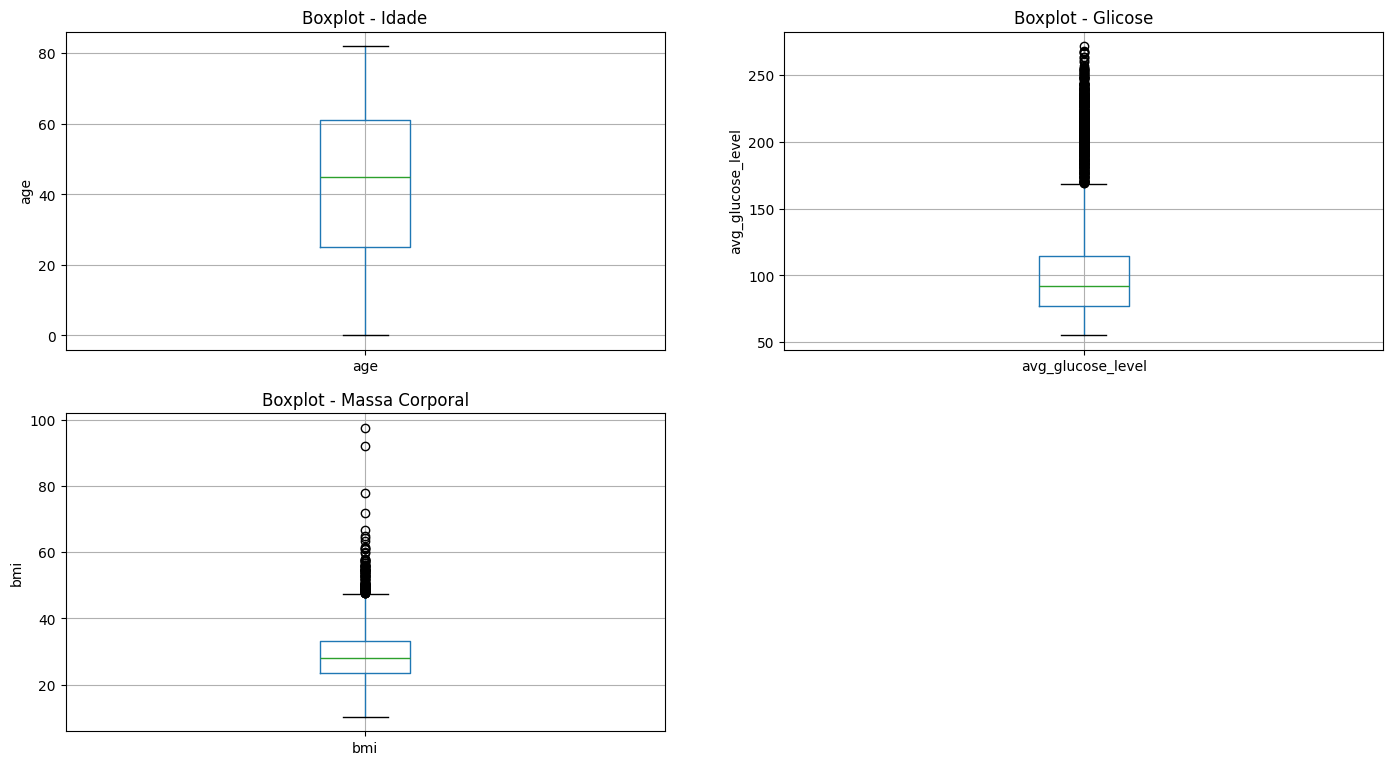

In [7]:
#Avaliando as variáveis quantitativas para encontrar Outliers
#Vou visualizar apenas as quantitativas retirando as categoricas de 0/1 que não farão diferença nessa análise

plt.figure(figsize=(17,19))


plt.subplot(4, 2, 1)
fig = df_AVC.boxplot(column='age')
fig.set_title('Boxplot - Idade')
fig.set_ylabel('age')


plt.subplot(4, 2, 2)
fig = df_AVC.boxplot(column='avg_glucose_level')
fig.set_title('Boxplot - Glicose')
fig.set_ylabel('avg_glucose_level')


plt.subplot(4, 2, 3)
fig = df_AVC.boxplot(column='bmi')
fig.set_title('Boxplot - Massa Corporal')
fig.set_ylabel('bmi')



A média das idades é de 45 anos, porém a faixa etárea da base vai de 0 a 80 anos.
A maior concentração está entre 25 e 60 anos.


A média do IMC (BMI -  massa corporal) é de 30. A maior concentração é entre 25 e 35 e existem os outliers acima de 40 e alguns que vão até 100. (É muito estranho esse valor de 100 para o IMC - seria considerado um caso de obesidade extrema. Considerando que os dados foram extraídos da internet, não há como validar se houve erro)

A Glicemia, índice de açúcar no sangue, tem uma média de 90, sendo a maior concetração da base entre 80 e 110. Existem os pontos fora da curva, acima de 160 até 270, o que é considerado um valor para pessoas com diabetes.

In [8]:
df_AVC_hist = df_AVC[['age', 'avg_glucose_level','bmi']]

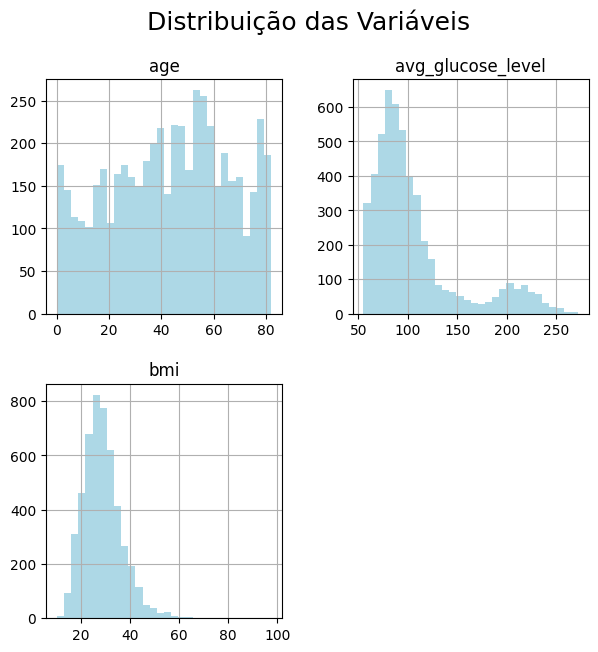

In [9]:
#Analisando a frequência das variáveis com o histograma
#Apenas as quantitativas retirando as categoricas de 0/1

df_AVC_hist.hist(bins=30, figsize=(7, 7), color='lightblue')
plt.suptitle('Distribuição das Variáveis', fontsize=18)
plt.show()


Aqui podemos ver uma distribuição assimétrica para esquerda tanto para o índice de açúcar no sangue como para o imc.
Isso significa uma concentração de valores mais baixos na base.

#Tratando os nulos

In [10]:
#A coluna BMI contém *valores nulos *

#anotações/ideias: Para distribuição de dados normal, preencher os nulos com média ---> df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

#Para distribuição assimétrica, preecheer com a mediana --> df['bmi'] = df['bmi'].fillna(df['bmi'].median())

filtro_bmi =df_AVC[(df_AVC['bmi'] >=1)]
filtro_bmi['bmi'].head(6)

,bmi
0,36.6
2,32.5
3,34.4
4,24.0
5,29.0
6,27.4


In [11]:
filtro_bmi['bmi'].median() #valor central que divide o conjunto em duas partes iguais.

28.1

In [12]:
#Tratando os nulos com a mediana pois se trata de uma base assimétrica
df_AVC['bmi'] = df_AVC['bmi'].fillna(df_AVC['bmi'].median())

In [13]:
df_AVC['bmi']

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


In [14]:
df_AVC.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


#Retirando a coluna ID

Vou retirar a colouna id, por se tratar apenas de um identificador e não ter nenhuma relação relevante com os dados. Se eu deixar, o modelo vai ficar procurando um padrão e isso afetará o desempenho.

In [15]:
df_AVC = df_AVC.drop(columns=['id'])

#Correlação

In [16]:
correlation_matrix = df_AVC.corr(numeric_only=True)

<Axes: >

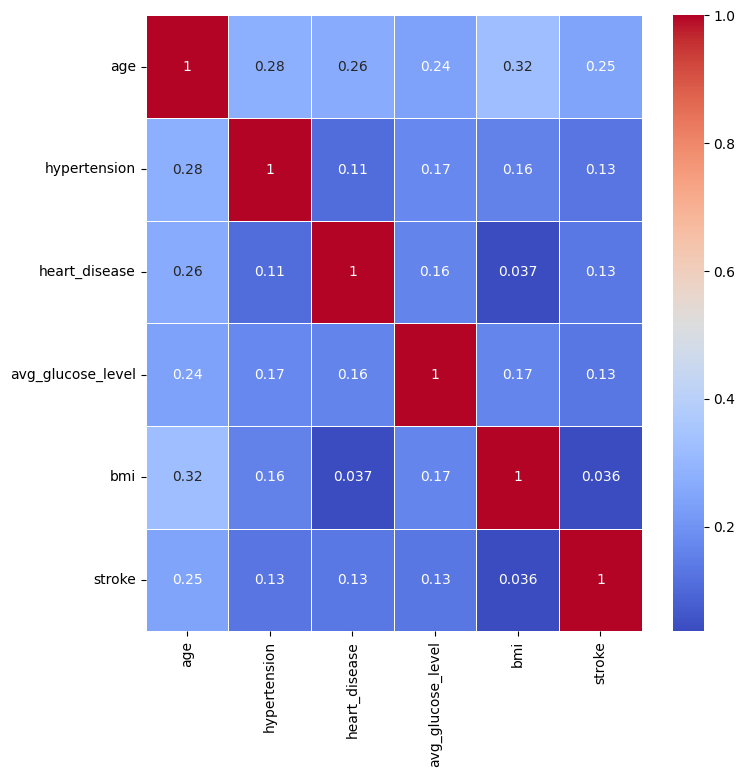

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

A variável age se correlaciona com a Hypertension, heart_disease, avg_glucose_level, bmi e stroke (ou seja, todas).

A maior correlação é a BMI, 0,32 seguido de Hypertension 0,28 e as demais na mesma faixa. Aqui não inclui as variáveis do tipo object. E todas as outras se relacionam com age (a mais alta correlação). Depois as variáveis se correloacionam entre si, porém é mais baixo o percentual de correlação.

 A variável Stroke - nossa target -  se correlaciona com age 0,25 e com as demais em menor nível.

In [18]:
cores = {0: 'lightblue', 1: 'orange'}

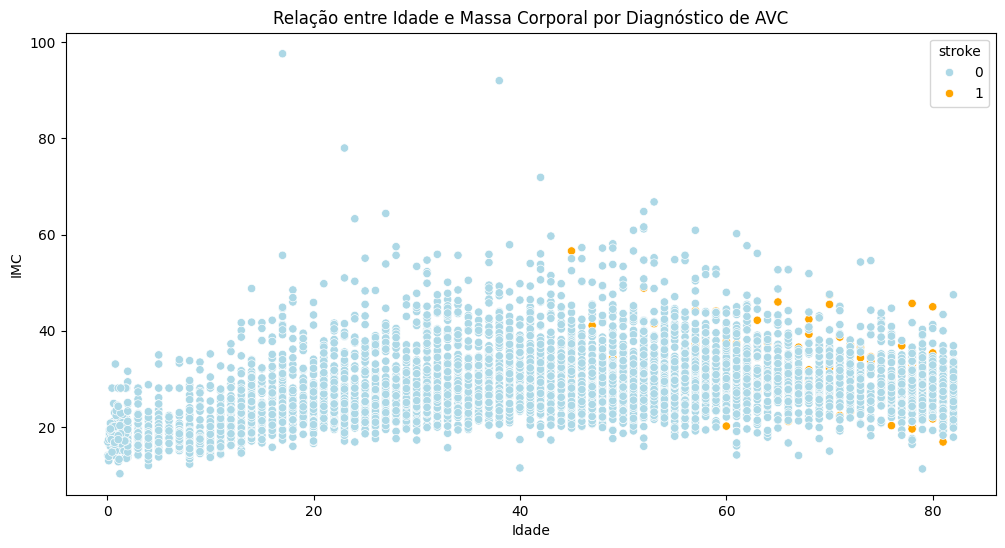

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_AVC, x='age', y='bmi', hue="stroke", palette = cores)
plt.title("Relação entre Idade e Massa Corporal por Diagnóstico de AVC")
plt.xlabel("Idade")
plt.ylabel("IMC")
plt.show()

Existe uma concentração da Massa Corporal de entre 20 e 40 para todas as faixas etáreas (de 0 a 85 anos-todas as idades) .

A concentração diminui com IMC acima de 40 chegando a 60 na faixa etária de 20 a 60 anos.  (já vimos isso no histograma e boxplot)

Logo, podemos pressumir que a maioria das pessoas de todas as faixas etárias da base estão com o IMC entre 20 e 40 e um percentual mínimo de pessoas entre 20 e 60 anos com IMC acima de 40.

**As pessoas com diagnóstico de AVC estão com o IMC Entre 35 a 50, e a idade entre 60 e 80 anos.**



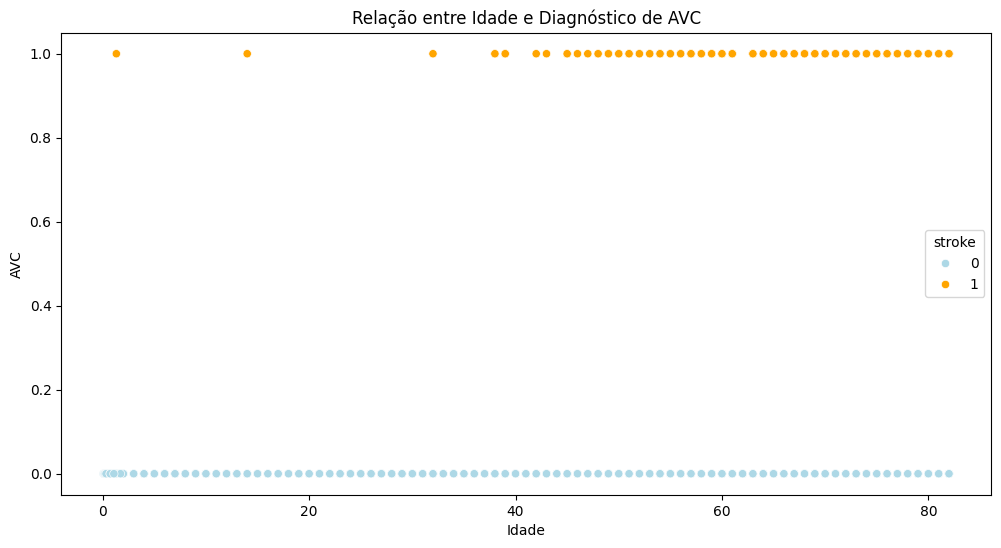

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_AVC, x='age', y='stroke', hue="stroke", palette = cores)
plt.title("Relação entre Idade e Diagnóstico de AVC")
plt.xlabel("Idade")
plt.ylabel("AVC")
plt.show()

As pessoas que tiveram o diagnóstico de AVC estão entre a faixa etárea de 40 a 80 anos.

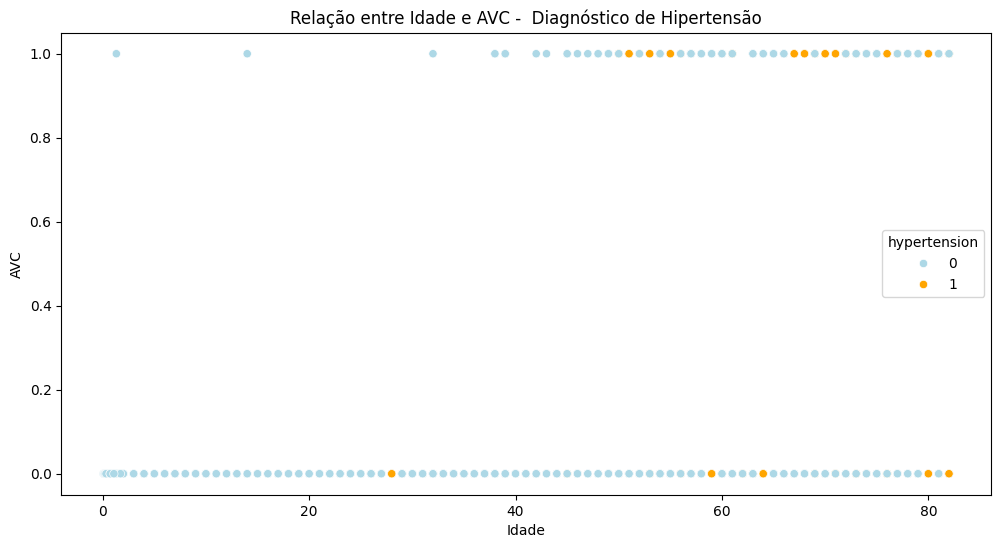

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_AVC, x='age', y='stroke', hue="hypertension", palette = cores)
plt.title("Relação entre Idade e AVC -  Diagnóstico de Hipertensão")
plt.xlabel("Idade")
plt.ylabel("AVC")
plt.show()

As pessoas com diagnóstico de AVC tem mais problemas de pressão em comparação as que não tem.

---



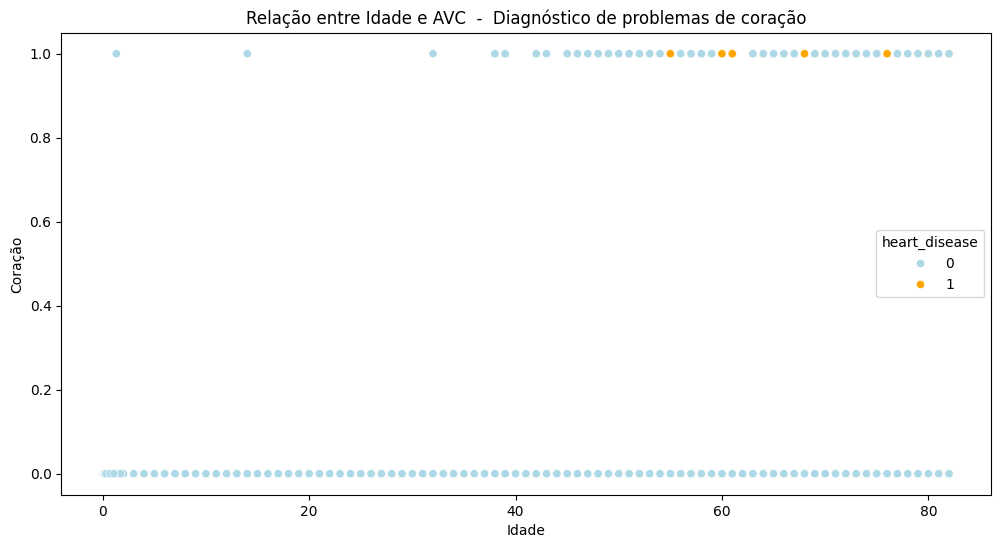

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_AVC, x='age',  y = 'stroke', hue='heart_disease', palette = cores)
plt.title("Relação entre Idade e AVC  -  Diagnóstico de problemas de coração")
plt.xlabel("Idade")
plt.ylabel("Coração")
plt.show()

As pessoas com diagnóstico de AVC tem mais problemas de coração em comparação as que não tem.

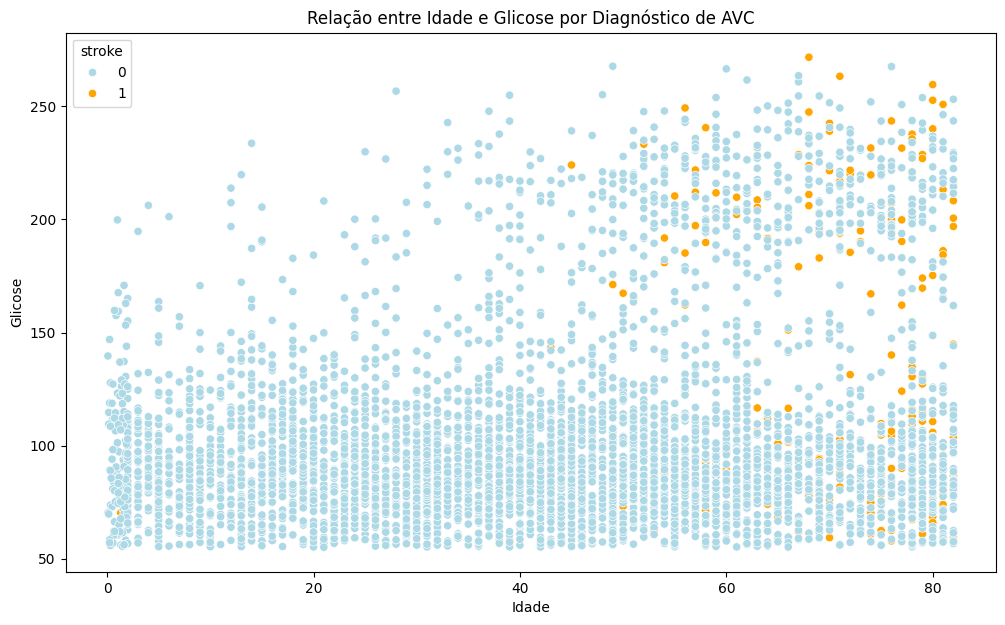

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_AVC, x='age', y='avg_glucose_level', hue='stroke' , palette=cores)
plt.title("Relação entre Idade e Glicose por Diagnóstico de AVC")
plt.xlabel("Idade")
plt.ylabel("Glicose")
plt.show()

As pessoas com diagnóstico de AVC estão entre a faixa etárea de 40 a 60 anos, com uma concentração de pessoas com a glicose acima de 160.

In [24]:
df_AVC['stroke'].value_counts()

,count
stroke,
0,4861
1,249


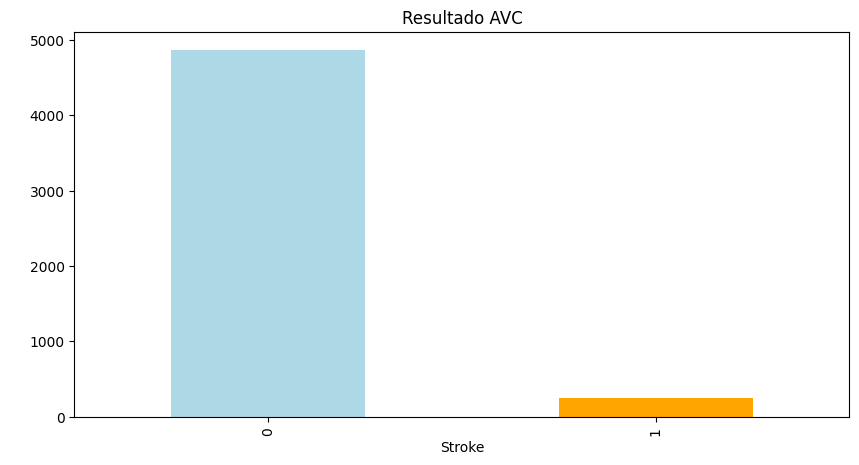

In [25]:
plt.figure(figsize=(10,5))
df_AVC['stroke'].value_counts().plot(kind='bar',  color = ['lightblue','orange'])
plt.xlabel('Stroke')
plt.ylabel(' ')
plt.title('Resultado AVC')
plt.show()

Existe um número maior de pessoas sem o diagnóstico de AVC na base, logo, podemos considerar que a base está **desbalanceada**. Isso impacta diretamente na visualização da correlação e no aprendizado de máquina.
Talvez, seja melhor analisar a correlação apenas das pessoas com diagnóstico de AVC.

# Correlação - Apenas disgnóstico de AVC

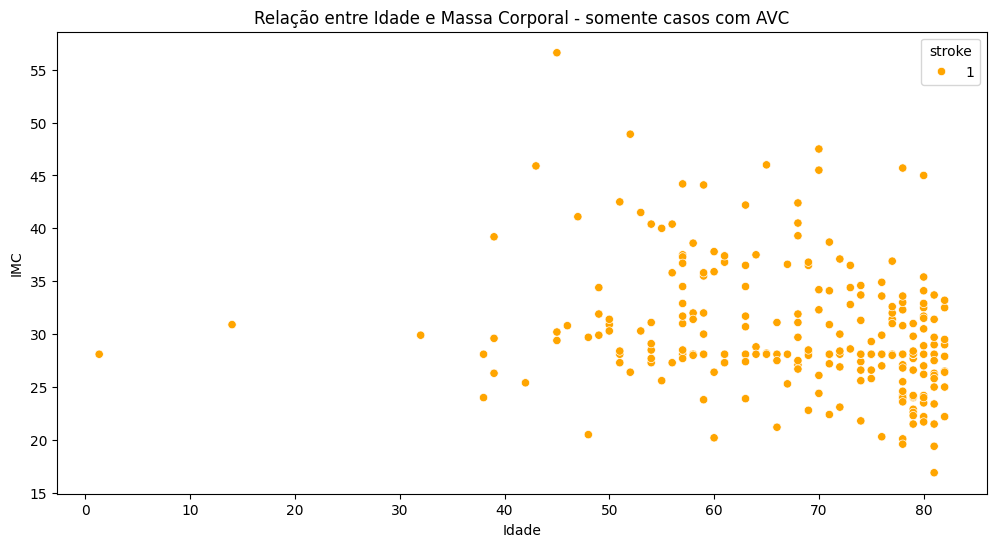

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_AVC[df_AVC['stroke'] == 1], x='age', y='bmi', hue="stroke", palette=cores)
plt.title("Relação entre Idade e Massa Corporal - somente casos com AVC")
plt.xlabel("Idade")
plt.ylabel("IMC")
plt.show()

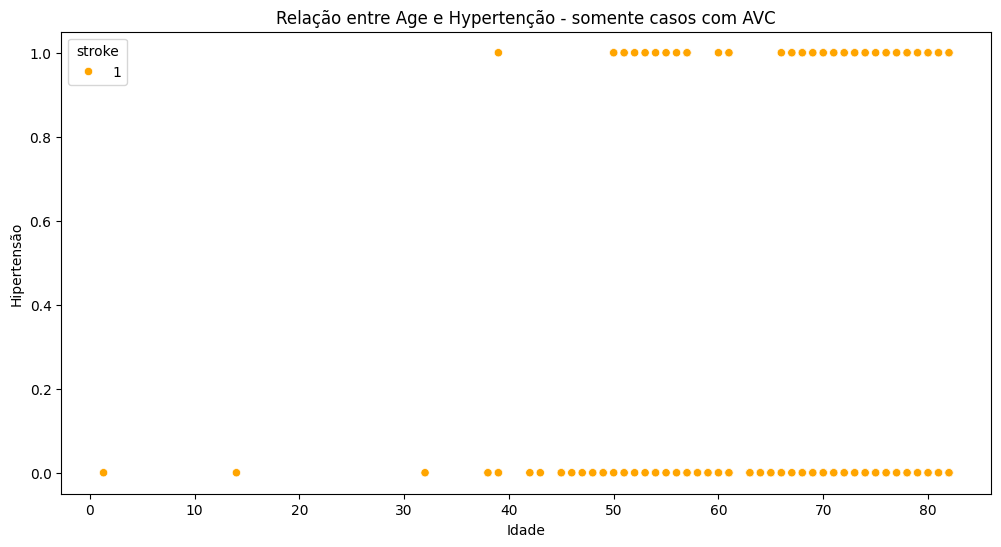

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_AVC[df_AVC['stroke'] == 1], x='age', y='hypertension', hue="stroke", palette=cores)
plt.title("Relação entre Age e Hypertenção - somente casos com AVC")
plt.xlabel("Idade")
plt.ylabel("Hipertensão")
plt.show()

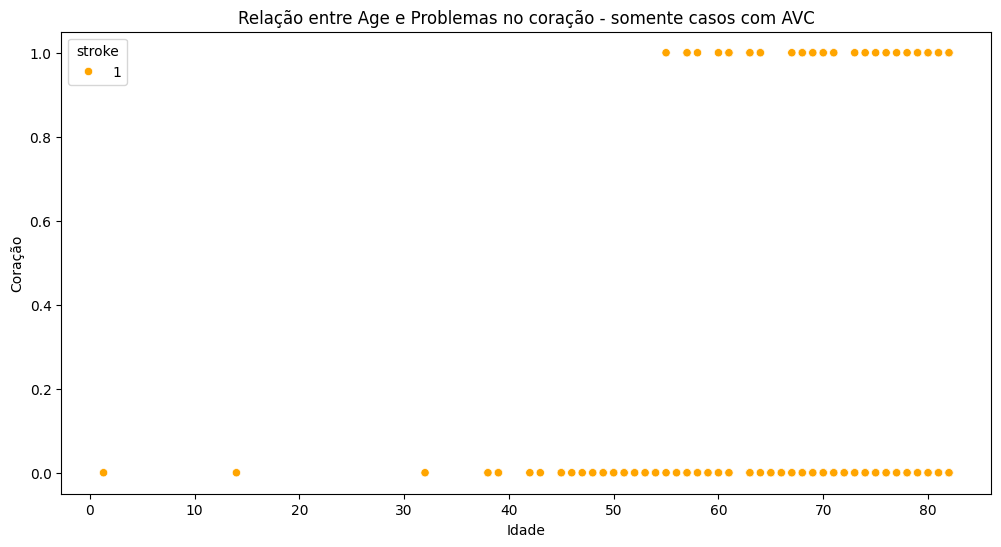

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_AVC[df_AVC['stroke'] == 1], x='age', y='heart_disease', hue="stroke", palette=cores)
plt.title("Relação entre Age e Problemas no coração - somente casos com AVC")
plt.xlabel("Idade")
plt.ylabel("Coração")
plt.show()

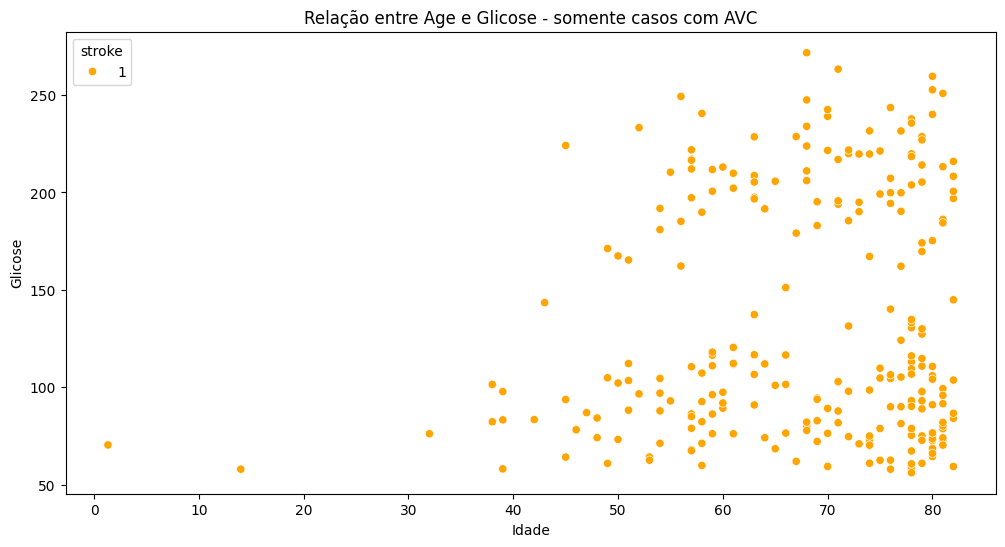

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_AVC[df_AVC['stroke'] == 1], x='age', y='avg_glucose_level', hue="stroke", palette=cores)
plt.title("Relação entre Age e Glicose - somente casos com AVC")
plt.xlabel("Idade")
plt.ylabel("Glicose")
plt.show()


Quando eu analiso apenas os casos de pessoas que tiveram AVC, noto que são casos com
IMC entre 20 e 40, na faixa etária entre 40 e 80 anos.

Pessoas com problemas de pressão na faixa entre 50 e 80 anos tiveram diagnóstico de AVC, mas não é a maioria.
Existem casos sem problema de pressão que também tiveram casos de AVC.

O mesmo ocorre com o diagnóstico de problema no coração. Existem pessoas com problemas no coração que tiveram o diagnóstico de AVC na faixa dos 55 a 80 anos.
Mas a maioria dos casos de de diagnóstico de AVC não tiveram problema no coração.

E a glicose dos casos de diagnóstico de AVC está na faixa entre 55 e 250 entre 60 e 80 anos, confirmando a alta correlação vista anteriormente.


#Proporções

/tmp/ipython-input-30-1030740655.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_AVC.groupby('FaixaEtaria')['stroke'].mean().plot(kind='bar', color='orange' )


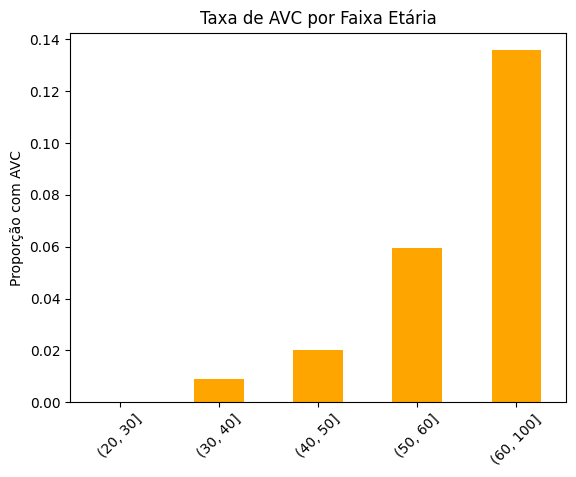

In [30]:
df_AVC['FaixaEtaria'] = pd.cut(df_AVC['age'], bins=[20, 30, 40, 50, 60, 100])

df_AVC.groupby('FaixaEtaria')['stroke'].mean().plot(kind='bar', color='orange' )
plt.title('Taxa de AVC por Faixa Etária')
plt.ylabel('Proporção com AVC')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

(array([], dtype=float64), [])

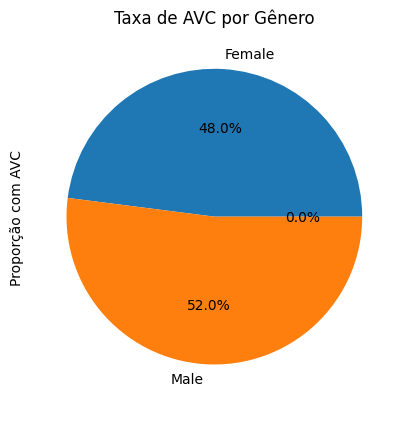

In [31]:
df_AVC.groupby('gender')['stroke'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Taxa de AVC por Gênero')
plt.ylabel('Proporção com AVC')
plt.xlabel(' ')
plt.xticks(rotation=45)

(array([], dtype=float64), [])

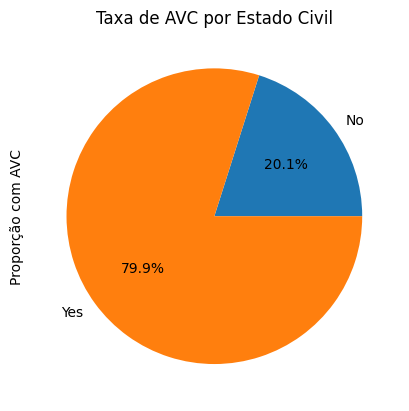

In [32]:
df_AVC.groupby('ever_married')['stroke'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Taxa de AVC por Estado Civil')
plt.ylabel('Proporção com AVC')
plt.xlabel('')
plt.xticks(rotation=45)

(array([], dtype=float64), [])

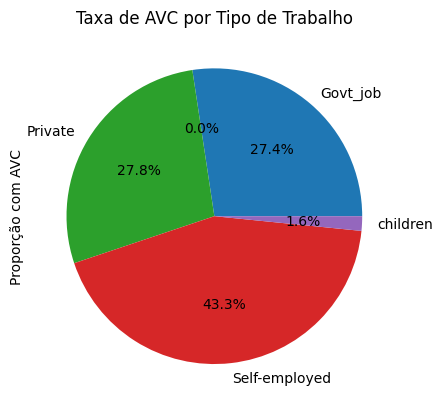

In [33]:
df_AVC.groupby('work_type')['stroke'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title('Taxa de AVC por Tipo de Trabalho')
plt.ylabel('Proporção com AVC')
plt.xlabel('')
plt.xticks(rotation=45)

(array([], dtype=float64), [])

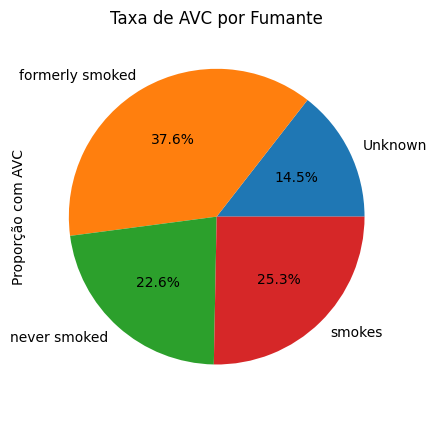

In [34]:
df_AVC.groupby('smoking_status')['stroke'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Taxa de AVC por Fumante')
plt.ylabel('Proporção com AVC')
plt.xlabel(' ')
plt.xticks(rotation=45)

#Filtros

In [35]:
df_AVC['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [36]:
df_AVC['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [37]:
df_AVC['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [38]:
df_AVC['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [39]:
df_AVC['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


#Normalização / pré processamento

O dataset possui variáveis categóricas. Iremos realizar a transformação de label enconding.



In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df_AVC['ever_married']=LabelEncoder().fit_transform(df_AVC['ever_married'])


In [42]:
df_AVC['gender']=LabelEncoder().fit_transform(df_AVC['gender'])

In [43]:
df_AVC['work_type']=LabelEncoder().fit_transform(df_AVC['work_type'])


In [44]:
df_AVC['smoking_status']=LabelEncoder().fit_transform(df_AVC['smoking_status'])

In [45]:
df_AVC['Residence_type']=LabelEncoder().fit_transform(df_AVC['Residence_type'])

In [46]:
df_AVC.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,FaixaEtaria
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,"(60, 100]"
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1,"(60, 100]"
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,"(60, 100]"
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,"(40, 50]"
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,"(60, 100]"


In [47]:
#Apagando a faixa etária para treinar o modelo
df_AVC= df_AVC.drop(columns=['FaixaEtaria'])


# Machine Learning - Logist regression  - com balanceamento

In [48]:
#importando as bilbiotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
#criando x e y
x = df_AVC[['age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df_AVC['stroke']

In [50]:
#separando a base
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
#criando o modelo com balanceamento
log_reg_balance = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [52]:
#treinando o modelo com balanceamento
log_reg_balance.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [53]:
#testando o modelo com balanceamento
y_pred = log_reg_balance.predict(x_test)

In [54]:
#verificando a acurácia
accurac = log_reg_balance.score(x_test, y_test)
print("Temos uma Acurácia de: {:.2f}%".format(round(accurac,2) * 100))

Temos uma Acurácia de: 75.00%


In [55]:
# criando o modelo sem balanceamento
log_reg= LogisticRegression( )

In [56]:
#treinando o modelo sem balanceamento
log_reg.fit(x_train, y_train)

LogisticRegression()

In [57]:
#testando o modelo sem balanceamento
y_pred = log_reg.predict(x_test)

In [58]:
# verificando a acurácia - sem balanceamento
accurac = log_reg.score(x_test, y_test)
print("Temos uma Acurácia de: {:.2f}%".format(round(accurac,2) * 100))

Temos uma Acurácia de: 94.00%


Acurária exatamente esperada para uma base desbalanceada.

In [59]:
#########
###Analisando o peso de cada variável para ver o que foi considerado
coeficientes = pd.Series(log_reg_balance.coef_[0], index=x_train.columns)
coeficientes_ordenados = coeficientes.sort_values(ascending=False)
print(coeficientes_ordenados)

hypertension         0.464904
heart_disease        0.359083
age                  0.071020
smoking_status       0.014383
avg_glucose_level    0.004335
bmi                  0.000404
dtype: float64


Quanto maior o valor absoluto do coeficiente, maior o impacto dessa variável.

Sinal positivo: aumenta a chance do diagnóstico positivo (ex: AVC = 1).

Sinal negativo: diminui a chance. (ex: AVC = 0)

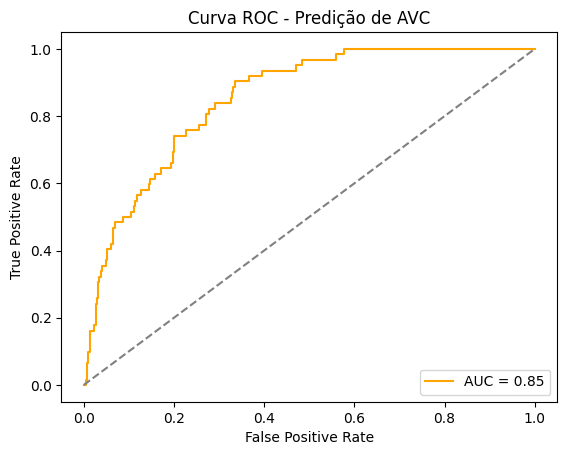

In [60]:
#curva ROC do modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score

y_proba = log_reg.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Predição de AVC')
plt.legend(loc="lower right")
plt.show()

Aqui temos uma acurácia de 75%, bem realista e a AUC de 0,85. Isso indica que o modelo está aprendendo padroes reais e não está focando só na maioria (casos sem AVC) Essa curva acima, bem longe da curva cinza, indica que ele está aprendenndo padrões reais.

<Axes: >

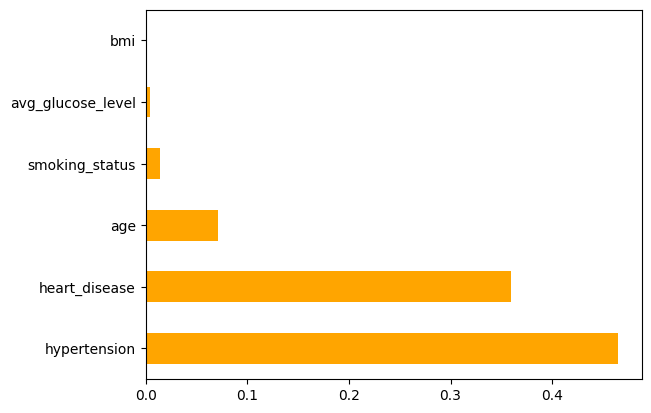

In [61]:
coeficientes_ordenados.plot(kind='barh', color=coeficientes_ordenados.apply(lambda x: 'lightblue' if x < 0 else 'orange'))

#Construção do moledo - XBBoost - com suporte a desbalanceamento



In [68]:
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import  accuracy_score

In [63]:

# Calculando o peso da classe (para compensar o desbalanceamento)
# Fórmula simples: (número de exemplos da classe 0) / (número da classe 1)
count_0 = np.sum(y_train == 0)
count_1 = np.sum(y_train == 1)
scale_pos_weight = count_0 / count_1

print(f'Scale pos weight sugerido: {scale_pos_weight:.2f}')

Scale pos weight sugerido: 20.86


In [64]:
# Criando o modelo XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [69]:
# Treinando o modelo XGBoost
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:28:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [70]:
# Fazendo as previsões do modelo
y_pred_xgb = xgb_model.predict(x_test)
y_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

In [71]:
#acurácia do modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", round(accuracy_xgb,2))

Accuracy: 0.91


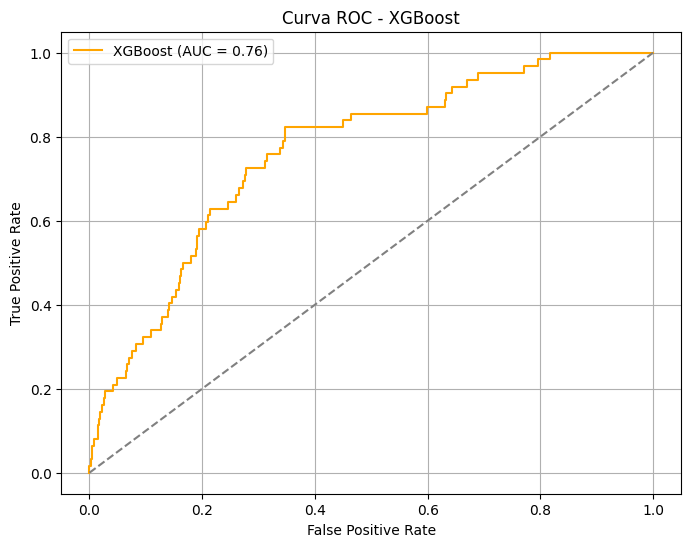

In [72]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
importancias = pd.Series(xgb_model.feature_importances_, index=x_train.columns)
importancias_ordenadas = importancias.sort_values()
print (importancias_ordenadas)

smoking_status       0.101651
heart_disease        0.105233
hypertension         0.114601
avg_glucose_level    0.139712
bmi                  0.152471
age                  0.386332
dtype: float32


<Axes: >

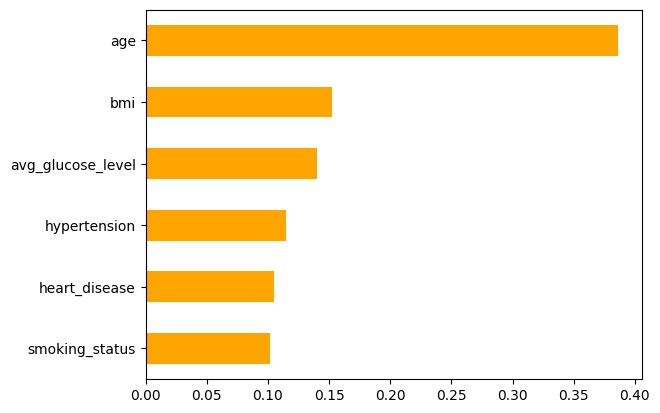

In [74]:
importancias_ordenadas.plot(kind='barh', color='orange')

#Equilibrando a base para o Random Forest

In [75]:
#import da biblioteca resample
from sklearn.utils import resample

In [76]:
# Separando as classes majoritárias e minoritárias
df_majority = df_AVC[df_AVC.stroke == 0]
df_minority = df_AVC[df_AVC.stroke == 1]

In [77]:
# Upsampling da classe minoritária
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),  random_state=7)


In [78]:
# Juntando os dois DataFrames
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

In [79]:
df_equilibrado.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,1,14.0,0,0,0,1,0,161.28,19.1,0,0
254,0,47.0,0,0,1,2,1,210.95,50.1,0,0


<Axes: xlabel='stroke', ylabel='count'>

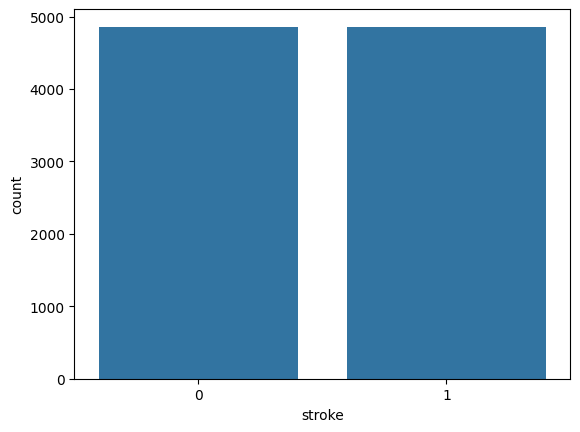

In [80]:
sns.countplot(x='stroke',data=df_equilibrado)

# Testando com Random Forest com a base equilibrada

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
x_equilibrado = df_equilibrado.drop(columns=['stroke'])
y_equilibrado = df_equilibrado['stroke']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)


In [84]:
# Instanciando o modelo Random Forest e define os hiperparâmetros
rf = RandomForestClassifier(random_state=7)


In [85]:
# Treina o modelo com o conjunto de treinamento
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=7)

In [86]:
# Faz previsões no conjunto de teste
y_pred_rf = rf.predict(x_test)


# Validando o modelo

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_equilibrado_rf,2))


Accuracy: 0.99


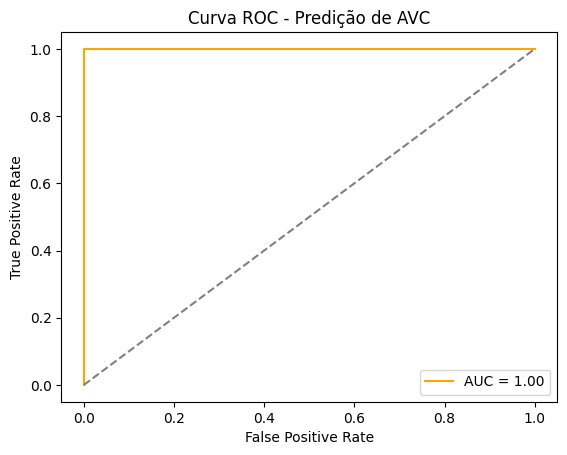

In [89]:
y_proba = rf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Predição de AVC')
plt.legend(loc="lower right")
plt.show()

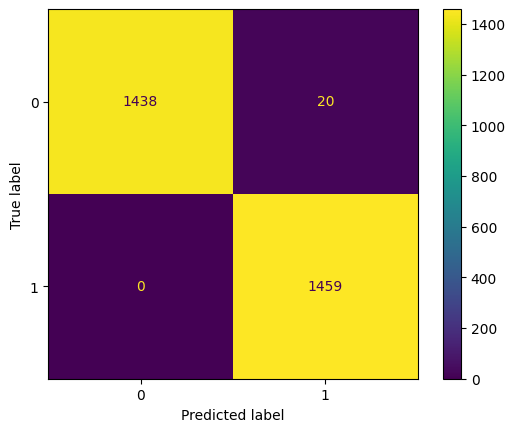

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test)
plt.show()

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_equilibrado, y_equilibrado, cv=5, scoring='roc_auc')
print("AUC em cada fold:", scores)
print("AUC média:", scores.mean())

AUC em cada fold: [1. 1. 1. 1. 1.]
AUC média: 1.0


#Conclusão

Conclusão dos Modelos Avaliados


✅ Logistic Regression com balanceamento das classes apresentou uma acurácia de 75% e AUC de 0,85, indicando que o modelo está aprendendo com padrões reais e não está focando só na maioria (casos sem AVC).

✅ XBBoost com a base balanceada, atingiu uma acurácia de 91% e um AUC de 0,76. Tivemos uma acurácia alta, que pode estar influenciada pelo desbalanceamento das classes, mas um AUC muito bom, indicando boa separação das classes (AVCe não AVC).

✅ Random Forest, também balanceado, que apresentou um resultado desfavorável com a acurácia de 99% e AUC de 1,00, indicando overfitting.




**Conclusão**: Dos 3 modelos testados, o Logistic Regression apresentou o melhor desempenho em termos de separação entre as classes, com AUC de 0.85.
Ele foi o mais eficaz na tarefa central do projeto: identificar corretamente os casos de AVC, mesmo com o desbalanceamento da base.

